# Count Vectorizer Basic

In [143]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [144]:
import nltk 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [145]:
# Download NLTK resources
#########
#This resource includes the Punkt tokenizer models for tokenization.
nltk.download('punkt')
#WordNet is a lexical database for the English language
nltk.download('wordnet')
#This resource includes the pre-trained model for part-of-speech tagging using the averaged perceptron algorithm.
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to C:\Users\EYE
[nltk_data]     TEC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\EYE
[nltk_data]     TEC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\EYE TEC\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [146]:
df = pd.read_csv('bbc_news_dataset.csv')

In [147]:
df.head() 

,news,type
0,China had role in Yukos split-up\n \n China le...,business
1,Oil rebounds from weather effect\n \n Oil pric...,business
2,Indonesia 'declines debt freeze'\n \n Indonesi...,business
3,$1m payoff for former Shell boss\n \n Shell is...,business
4,US bank in $515m SEC settlement\n \n Five Bank...,business


In [128]:
inputs = df['news']
labels = df['type']

<AxesSubplot:>

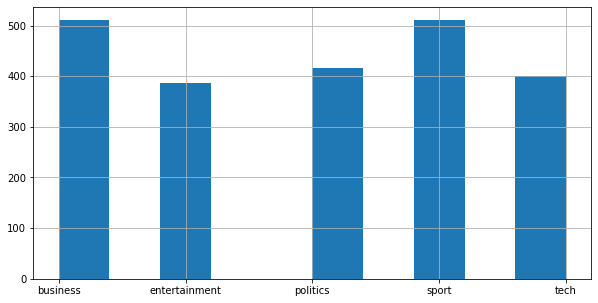

In [129]:
labels.hist(figsize = (10,5))
#to see wheather we have imbalnced classes.This is any class is over or underrepresented.

In [148]:
input_train, input_test, Ytrain , Ytest = train_test_split(inputs , labels , test_size=0.2, random_state=42)

In [149]:
vectorizer = CountVectorizer()

In [150]:
Xtrain = vectorizer.fit_transform(input_train)
Xtest = vectorizer.transform(input_test)

In [151]:
Xtrain

<1780x26856 sparse matrix of type '<class 'numpy.int64'>'
	with 359764 stored elements in Compressed Sparse Row format>

In [152]:
(Xtrain !=0).sum()

359764

In [153]:
#computer the percentage of values which are non-zero
(Xtrain !=0).sum() / np.prod(Xtrain.shape)

0.007525864117574212

In [155]:
model = MultinomialNB()
model.fit(Xtrain,Ytrain)
print("train score: ",model.score(Xtrain,Ytrain))
print("test score: " ,model.score(Xtest,Ytest))

train score:  0.9932584269662922
test score:  0.9640449438202248


# Count Vectorizer - character based tokenization

In [157]:
vectorizer = CountVectorizer(analyzer="char")

Xtrain = vectorizer.fit_transform(input_train)
Xtest = vectorizer.transform(input_test)

In [158]:
Xtrain

<1780x63 sparse matrix of type '<class 'numpy.int64'>'
	with 71310 stored elements in Compressed Sparse Row format>

In [159]:
(Xtrain !=0).sum() / np.prod(Xtrain.shape)

0.6359015516318887

In [160]:
model = MultinomialNB()
model.fit(Xtrain,Ytrain)
print("train score: ",model.score(Xtrain,Ytrain))
print("test score: " ,model.score(Xtest,Ytest))

train score:  0.6640449438202247
test score:  0.6292134831460674


# Count Vectorizer - with stopwords

In [161]:
#with stopwords
vectorizer = CountVectorizer(stop_words='english')
Xtrain = vectorizer.fit_transform(input_train)
Xtest = vectorizer.transform(input_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("Train score:", model.score(Xtrain, Ytrain))
print("Test score:", model.score(Xtest, Ytest))

Train score: 0.9938202247191011
Test score: 0.9640449438202248


In [162]:
Xtrain

<1780x26563 sparse matrix of type '<class 'numpy.int64'>'
	with 257896 stored elements in Compressed Sparse Row format>

In [163]:
(Xtrain !=0).sum() / np.prod(Xtrain.shape)

0.005454406251493693

# Count Vectorizer - with stopwords and character based tokenization

In [164]:
vectorizer = CountVectorizer(stop_words='english' , analyzer='char')
Xtrain = vectorizer.fit_transform(input_train)
Xtest = vectorizer.transform(input_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("Train score:", model.score(Xtrain, Ytrain))
print("Test score:", model.score(Xtest, Ytest))

Train score: 0.6640449438202247
Test score: 0.6292134831460674


In [165]:
Xtrain

<1780x63 sparse matrix of type '<class 'numpy.int64'>'
	with 71310 stored elements in Compressed Sparse Row format>

In [166]:
(Xtrain !=0).sum() / np.prod(Xtrain.shape)

0.6359015516318887

# Count Vectorizer - with Lemmanization

In [167]:
#using Lemmanization

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    elif treebank_tag.startswith('J'):
        return wordnet.ADJ
    else:
        return wordnet.NOUN  

In [168]:
class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        word_and_tags = nltk.pos_tag(tokens)
        return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in word_and_tags]

In [169]:
#with stopwords
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer())
Xtrain = vectorizer.fit_transform(input_train)
Xtest = vectorizer.transform(input_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("Train score:", model.score(Xtrain, Ytrain))
print("Test score:", model.score(Xtest, Ytest))

Train score: 0.9932584269662922
Test score: 0.9595505617977528


In [170]:
Xtrain

<1780x26594 sparse matrix of type '<class 'numpy.int64'>'
	with 349550 stored elements in Compressed Sparse Row format>

In [171]:
(Xtrain !=0).sum() / np.prod(Xtrain.shape)

0.007384237214950065

# Count Vectorizer - with StemTokenizer

In [176]:
class StemTokenizer:
    def __init__(self):
        self.porter = PorterStemmer()
    
    def __call__(self, doc):
        tokens = word_tokenize(doc)
        return [self.porter.stem(t) for t in tokens]

In [177]:
vectorizer = CountVectorizer(tokenizer=StemTokenizer())
Xtrain = vectorizer.fit_transform(input_train)
Xtest = vectorizer.transform(input_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("Train score:", model.score(Xtrain, Ytrain))
print("Test score:", model.score(Xtest, Ytest))

Train score: 0.9915730337078652
Test score: 0.9617977528089887


In [174]:
Xtrain

<1780x23307 sparse matrix of type '<class 'numpy.int64'>'
	with 357390 stored elements in Compressed Sparse Row format>

In [175]:
(Xtrain !=0).sum() / np.prod(Xtrain.shape)

0.008614617877736496

# Count Vectorizer - with simple word split tokenizer

In [181]:
def simple_tokenizer(s):
    return s.split()

In [182]:
vectorizer = CountVectorizer(tokenizer=simple_tokenizer)
Xtrain = vectorizer.fit_transform(input_train)
Xtest = vectorizer.transform(input_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("Train score:", model.score(Xtrain, Ytrain))
print("Test score:", model.score(Xtest, Ytest))

Train score: 0.9960674157303371
Test score: 0.9550561797752809


In [184]:
Xtrain

<1780x53696 sparse matrix of type '<class 'numpy.int64'>'
	with 393654 stored elements in Compressed Sparse Row format>

In [185]:
(Xtrain !=0).sum() / np.prod(Xtrain.shape)

0.004118629554981184

In [183]:
# We've learn that it's not all clear which method will perform best before we try

# What is the vector dimensionality of each case? Xtrain
# Compare and consider why they are laeger/ smaller